In [193]:
from typing import *
import math
import numpy as np

import matplotlib.pyplot as plt

<br>

# Independence (reminders)
---

<br>

### Definition

Two random variables $X$ and $Y$ are independent **if their joint probability can be factorized** in two marginal distributions:

&emsp; $X$ and $Y$ are independent $\iff p(X,Y) = p(X) p(Y) \iff p(Y|X) = p(Y) \iff p(Y|X) = P(Y)$

Two random variables $X$ and $Y$ are independent conditioned on some other variable or ensemble of variables $H$ **if their joint probability conditioned on $H$ can be factorized** in two marginal distributions that only depend on $H$:

&emsp; $X$ and $Y$ are independent given $H$ $\iff p(X,Y|H) = p(X|H) p(Y|H) \iff p(Y|X,H) = p(Y|H) \iff p(Y|X,H) = P(Y|H)$

Note that conditional dependence and dependence do not imply each other:

* We can conditioned on a confounder $C$ to make two dependent variables independent given $C$
* We can conditioned on a merger $C$ to make two independent variables dependent given $C$

<br>

### Impact on mutual information

Two random variables $X$ and $Y$ means that **the knowledge of one does not inform you on the other**. This can be shown by refering to the definition of mutual information from information theory, which is the difference of entropy between $Y$ knowing $X$ and $Y$:

&emsp; $I(Y;X) = H[Y|X] - H[X] = - \sum_x \sum_y p(x,y) \log p(y|x) + \sum_y p(y) \log p(y) = 0$

What this means is that the entropy of $Y$ does not change with the knowledge of $X$. The knowledge of $X$ simply has no impact on the distribution of $Y$: no information is gained (no disorder disappears) from the information.

<br>

### Impact on covariance

The covariance is defined as:

&emsp; $\operatorname{Cov}[X,Y] = E_{XY}[(X-\bar{X})(Y-\bar{Y})] = E_{XY}[XY] - \bar{X}\bar{Y}$
&emsp; where
&emsp; $\bar{X} = E_X[X]$ and $\bar{Y} = E_Y[Y]$

**If two variables are idenpendent, their covariance is null**. This can be shown rather easily:

&emsp; $\operatorname{Cov}[X,Y] = E_{XY}[XY] - \bar{X}\bar{Y} = \sum_x \sum_y x y p(x,y) - \bar{X}\bar{Y} = \sum_x \sum_y x p(x) y p(y) - \bar{X}\bar{Y} = \bar{X}\bar{Y} - \bar{X}\bar{Y} = 0$

**The opposite is not true**: in fact, as we will see below, covariance only reflect perfectly linear relationship.

<br>

# Pearson's correlation factor
---

Given a random variable $X$, from which a random variable is created by $Y = m X + Z$, where $Z$ is a random variable representing the noise. We assume that:

* the signal X and the noise Z are independent
* X has mean 0 and variance $\sigma_x^2$
* Z has mean 0 and variance $\sigma_z^2$
* Y has mean 0 and variance $\sigma_y^2 = m^2 \sigma_x^2 + \sigma_z^2$ (variance of independent variables are added)

<br>

### Improved guessing

$Y$ has a dependency to $X$. Thus, if we have some information on the value of $X$, we can have a better estimation of $Y$.

**Without knowing X, the best guess we could do for Y would be $E[Y]$**, because the expected value is the value that minimizes the mean square distance, which is the variance around our guess $\mu$:

&emsp; $\displaystyle E = \frac{1}{N} \sum (y_n - \mu)^2 \implies \nabla E = \frac{2}{N} \sum (y_n - \mu) = 0 \implies \mu = \frac{1}{N} \sum y_n$

**With knowledge of $X$, the best guess we can do is $E[Y|X] = m X + E[Z]$**:

&emsp; $\displaystyle E = \frac{1}{N} \sum (y_n - \mu)^2 = \frac{1}{N} \sum (m x + z_n - \mu)^2 \implies \nabla E = \frac{2}{N} \sum (m x + z_n - \mu) = 0 \implies \mu = m x + \frac{1}{N} \sum z_n$

If $E[Y|X] = E[Y]$, then there is no correlation between $X$ and $Y$, and the variance around our guess will stay the same. If $E[Y|X] \neq E[Y]$, then there is a correlation between X and Y, and the variance around our guess $\mu$ should be reduced to the variance of the noise $Z$.

In reality, for regression tasks, the error will always be higher than the variance of the noise $Z$ which serves as lower bound:

&emsp; $\text{Error} = \operatorname{Noise}_{data} + \operatorname{Bias}_{model}^2 + \operatorname{Var}_{model}$.

<br>

### Correlation factor (theory)

The linear dependency between $X$ and $Y$ can be estimated by computing the Pearson's correlation factor, which **measures the improvement of precision** (the reduction of error) gained from the knowledge of $X$:

&emsp; $\displaystyle r= \frac{m \sigma_x}{\sigma_y}$
&emsp; which we can see differently as
&emsp; $\displaystyle r^2 = \frac{m^2 \sigma_x^2}{m^2 \sigma_x^2 + \sigma_z^2} = 1 - \frac{\sigma_z^2}{\sigma_y^2}$

Said differently, the square of the correlation factor $r$ is the reduction in variance from knowing $X$:

* A correlation factor of 1 or -1 corresponds to a value of $\sigma_z = 0$ (no noise and perfect prediction of $Y$ from $X$)
* A correlation factor of 0 corresponds to $m = 0$ (no linear relationship between X and Y exist).

From the correlation factor, we can compute the linear factor $m=r \frac{\sigma_y}{\sigma_x}$ in case we want to do a regression.

<br>

### Correlation factor (practically)

In general, we do not have the value of $m$, so the correlation factor $r$ above cannot be computed as shown above. Instead we compute it using the covariance, like so:

&emsp; $\displaystyle \boxed{r= \frac{Cov[X,Y]}{\sigma_x \sigma_y}}$
&emsp; where
&emsp; $Cov[X,Y] = E[(X-\bar{X})(Y-\bar{Y})] = E[XY] - E[X]E[Y]$

**Proof:** Ignoring the means, and based on X and Y being independent, we have:

&emsp; $Cov[X,Y] = E[XY] = E[X(mX+Z)] = m E[X^2] + E[XZ] = m \sigma_x^2 + 0$
&emsp; $\implies$
&emsp; $\displaystyle r = \frac{m \sigma_x^2}{\sigma_x \sigma_y} = \frac{m \sigma_x}{\sigma_y}$

The sample covariance can be estimated by: $\displaystyle \frac{1}{N-1} \sum (x_n - \bar{x}) (y_n - \bar{y})$

<br>

### Regression lines

We can find the slope $m$ of the regression line $Y = mX + Z$ through:

&emsp; $\displaystyle m=r \frac{\sigma_y}{\sigma_x} = \frac{Cov[X,Y]}{\sigma_x^2}$

Similarly, we can find the slop of $m'$, the regression line $X = m' Y + Z'$ through:

&emsp; $\displaystyle m'=r \frac{\sigma_x}{\sigma_y} = \frac{Cov[X,Y]}{\sigma_y^2}$

Note that these two lines are in general not the same (except when $m$ is 1).

<br>

# Example and illustration of "regression toward the mean"
---

Creation of two random variable $X$ and $Y$ with a linear correlation.

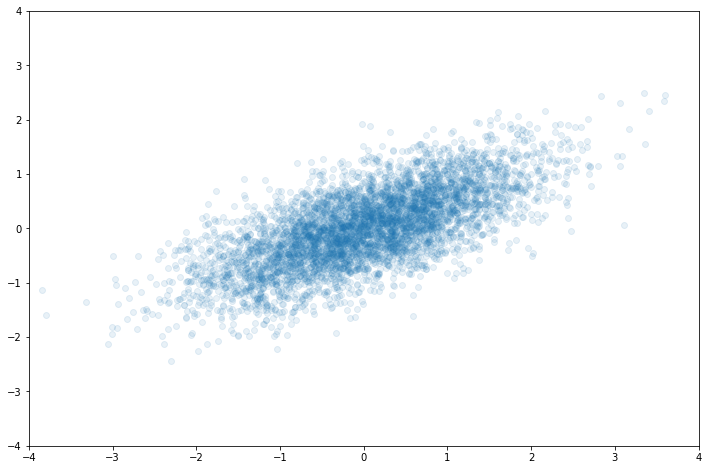

In [2]:
n = 5000
xs = np.random.normal(loc=0.0, scale=1.0, size=n)
ys = 0.5 * xs + np.random.normal(loc=0.0, scale=0.5, size=n)

plt.figure(figsize=(12, 8))
plt.scatter(xs, ys, alpha=0.1)
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()

Computation of the variance of $X$ and $Y$, their standard deviations, the covariance and correlation factor between the two variables.

In [3]:
mean_x = 1 / n * np.sum(xs)
mean_y = 1 / n * np.sum(ys)
print("sample mean of X:", mean_x)
print("sample mean of Y:", mean_y)

var_x = 1 / (n - 1) * ((xs - mean_x).T @ (xs - mean_x))
var_y = 1 / (n - 1) * ((ys - mean_y).T @ (ys - mean_y))
print("sample variance of X:", var_x)
print("sample variance of Y:", var_y)

std_x = np.sqrt(var_x)
std_y = np.sqrt(var_y)

cov = 1 / (n - 1) * ((ys - mean_y).T @ (xs - mean_x))
cor = cov / (std_x * std_y)
print("sample covariance: ", cov)
print("correlation:", cor)

sample mean of X: 0.008908499218795659
sample mean of Y: 0.010807488200689197
sample variance of X: 1.00326415920086
sample variance of Y: 0.5033598410029446
sample covariance:  0.49387013490730775
correlation: 0.6949696417097512


<br>

### Regression lines

We can now display the regression lines:

* $m1$ (how $Y$ varies in function of $X$)
* $m2$ (how $X$ varies in function of $Y$)
* $m$ (the ratio of standard deviation between X and Y)

X to Y: 0.4922633090976708
Y to X: 0.9811472721448564


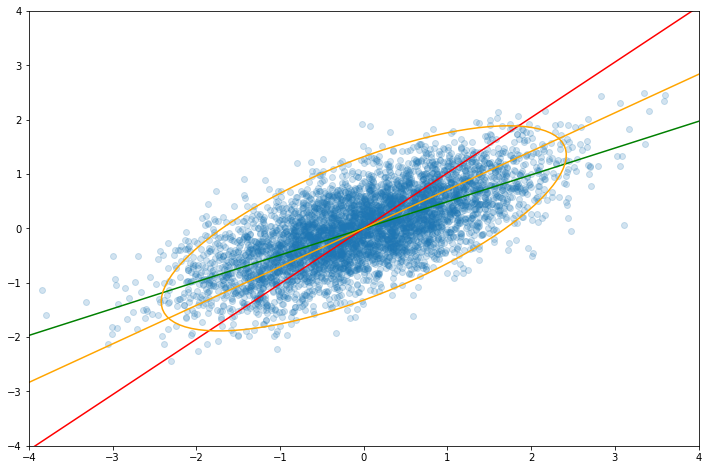

In [4]:
m1 = cov / var_x
m2 = cov / var_y
m = std_x / std_y
print("X to Y:", m1)
print("Y to X:", m2)


def make_elipse(xs, ys):
    # Compute the variance along the principal axis (eigen values of the covariance matrix)
    coords = np.concatenate((np.expand_dims(xs, axis=-1), np.expand_dims(ys, axis=-1)), axis=-1)
    cov_matrix = 1 / (len(xs) - 1) * coords.T @ coords
    eig_vals, eig_vects = np.linalg.eig(cov_matrix)
    eig_vals = np.sqrt(eig_vals)
    
    thetas = np.linspace(0., 2 * np.pi, 100)
    ellipse_xs = 2.5 * eig_vals[0] * np.cos(thetas)
    ellipse_ys = 2.5 * eig_vals[1] * np.sin(thetas)
    tilt = np.arctan2(std_y, std_x)
    xs2 = np.cos(tilt) * ellipse_xs - np.sin(tilt) * ellipse_ys
    ys2 = np.sin(tilt) * ellipse_xs + np.cos(tilt) * ellipse_ys
    return xs2, ys2


plt.figure(figsize=(12, 8))
plt.scatter(xs, ys, alpha=0.2)
plt.plot([-4, 4], [-4*m1, 4*m1], color='green')
plt.plot([-4, 4], [-4/m2, 4/m2], color='red')
plt.plot([-4, 4], [-4/m, 4/m], color='orange')
plt.plot(*make_elipse(xs, ys), color='orange')
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()

We see that:

1. The regression line of m1 passes through the left border of the ellipse
2. The regression line of m2 passes through the upper border of the ellipse

This is expected: these regression lines are placed such that the number of points above and below is balanced. They minimize the variance around the prediction (the least squares).

This is what we call the "regression toward the mean":

* if we take the value Y matching X, then X matching Y and so one, we reach the mean
* this show the classic phenomena of "a great year for a player is followed by a less great one": there is no necessity for causal reason behind this, only statistics
* performance = talent + luck : an exceptional year is likely due to high luck as well as high talent

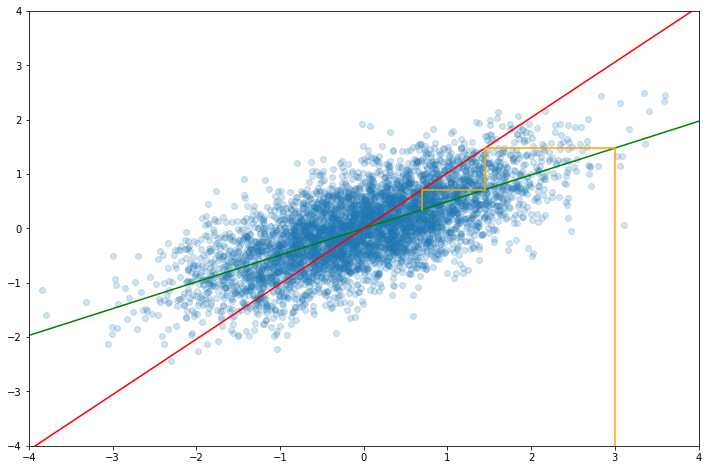

In [5]:
x1 = 3
y1 = m1 * x1
x2 = m2 * y1
y2 = m1 * x2
x3 = m2 * y2
y3 = m1 * x3

plt.figure(figsize=(12, 8))
plt.scatter(xs, ys, alpha=0.2)
plt.plot([-4, 4], [-4*m1, 4*m1], color='green')
plt.plot([-4, 4], [-4/m2, 4/m2], color='red')
plt.plot([x1, x1, x2, x2, x3, x3], [-4, y1, y1, y2, y2, y3], color='orange')
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()

<br>

### Linear regression (closed form)

Here done using the pseudo-inverse matrix.

* Matrix $X \in R^{n \times p}$ where $n$ is the number of samples, and $p$ is the number of features
* Matrix $Y \in R^{n \times l}$ where $n$ is the number of samples, and $l$ is the number of outputs
* Matrix $W \in R^{p \times l}$ of weights such that $Y_{pred} = X W$

We want to minimize the error $E = (X W - Y)^2$, as minimizing the square corresponds to maximizing the log likelihood if we assume the noise around the prediction is gaussian (and isotropic in case of multiple outputs).

Indeed, the probability of a dataset $D$ can be written as:

&emsp; $P(D) = \prod_n p(y_n|x_n) = \prod_n \frac{1}{\sqrt{2 \pi \sigma^2}} exp[- \frac{(y_n - f(x_n))^2}{2 \sigma^2}]$ where $f(x)$ is the function we are trying to guess, and $y_n = f(x_n) + noise$

&emsp; $log P(D) = \sum_n log(p(y_n|x_n)) = - \frac{N}{2} log (2 \pi \sigma^2) - \sum_n \frac{(y_n - f(x_n))^2}{2 \sigma^2}$

And so maximizing the probability of the data, is maximizing the log of the probability, which corresponds to minimizing the sum of the square errors $E$. We now rearange the expression of $E$ in order to make it easier to work with:

&emsp; $E = (X W - Y)^2 = (X W - Y)^T (X W - Y) = W^T X^T X W - Y^T X W - W^T X^T Y + Y^T Y$

We can transpose scalars freely (they are equal to their own transpose), so:

&emsp; $E = (X W - Y)^T (X W - Y) = W^T X^T X W - 2 W^T X^T Y + Y^T Y$

Now we compute the gradient with respect to $W$:

&emsp; $\nabla_W E = X^T X W + W^T X^T X - 2 X^T Y$

Since the matrix $X^T X$ is symetric, we have $W^T X^T X = X^T X W$:

&emsp; $\nabla_W E = 2 X^T X W - 2 X^T Y$

Setting the gradient to zero, we have: $X^T X W = X^T Y$

* $X^T X \in R^{p \times p}$ is the variance of the inputs $X$
* $X^T Y \in R^{p \times l}$ is the covariance of $X$ and $Y$
* $W$ is the ratio $\frac{Cov[X, Y]}{Var[X]}$, exactly what we had before

We can therefore solve for W:

&emsp; $W = (X^T X)^{-1} X^T Y$

where $X^+ = (X^T X)^{-1} X^T$ is called the Moore-Penrose inverse matrix (if $X$ is invertible, the all expression collapses to $X^{-1}$)

0.4923203416671752


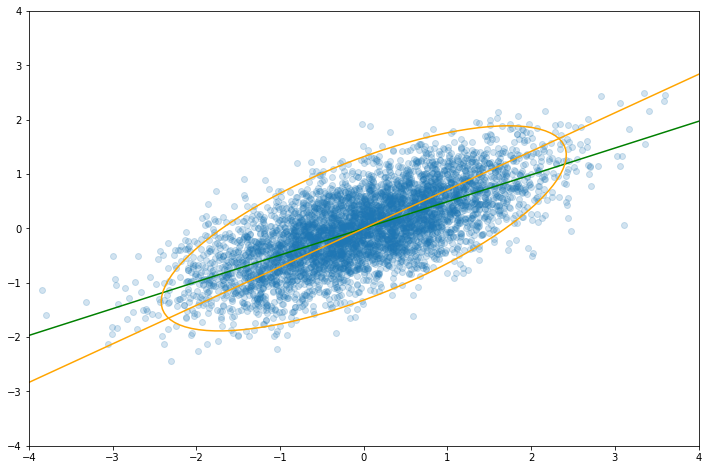

In [9]:
X = np.expand_dims(xs, axis=-1)
Y = np.expand_dims(ys, axis=-1)
W = np.linalg.inv(X.T @ X) @ X.T @ Y
m1 = W[0, 0]
print(m1)

plt.figure(figsize=(12, 8))
plt.scatter(xs, ys, alpha=0.2)
plt.plot([-4, 4], [-4*m1, 4*m1], color='green')
plt.plot([-4, 4], [-4/m, 4/m], color='orange')
plt.plot(*make_elipse(xs, ys), color='orange')
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()

<br>

### Linear regression (using SGD)

Here done using pytorch, will give you the same result

loss: 13.013274893164635
weight:  0.4928362965583801


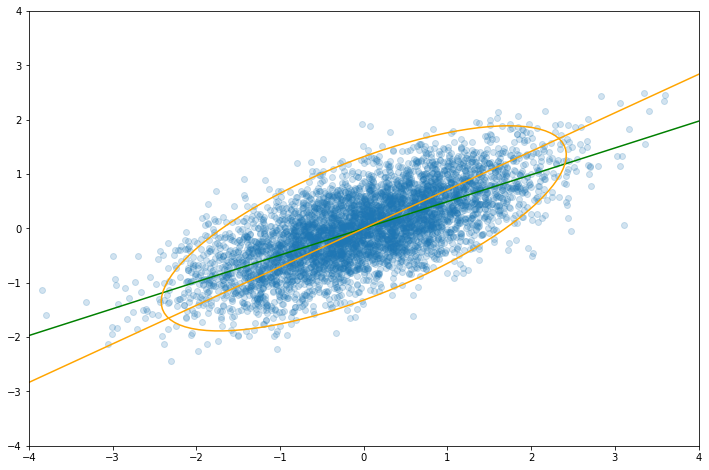

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data

model = nn.Linear(1, 1, bias=False)

optimizer = optim.Adam(model.parameters())
criterion = nn.MSELoss()
ds = data.TensorDataset(torch.FloatTensor(xs).unsqueeze(-1),
                        torch.FloatTensor(ys).unsqueeze(-1))
loader = data.DataLoader(ds, shuffle=True, batch_size=100)

episode_loss = float('inf')
for _ in range(100):
    episode_loss = 0.
    for x, y in loader:
        y_p = model(x)
        loss = criterion(y_p, y)
        optimizer.zero_grad()
        loss.backward()
        episode_loss += loss.item()
        optimizer.step()

m1 = model.weight.item()
print("loss:", episode_loss)
print("weight: ", m1)

plt.figure(figsize=(12, 8))
plt.scatter(xs, ys, alpha=0.2)
plt.plot([-4, 4], [-4*m1, 4*m1], color='green')
plt.plot([-4, 4], [-4/m, 4/m], color='orange')
plt.plot(*make_elipse(xs, ys), color='orange')
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()

<br>

# Limitation of correlation
---

As we have seen, the notion of correlation is there to find linear relations between random variables. No relation is perfectly linear. Computing the correlation factor might still be non-null in case of non-linear relationship, but having it equal to zero, does not mean the variables are not linked.

correlation factor: -0.016444737654315304


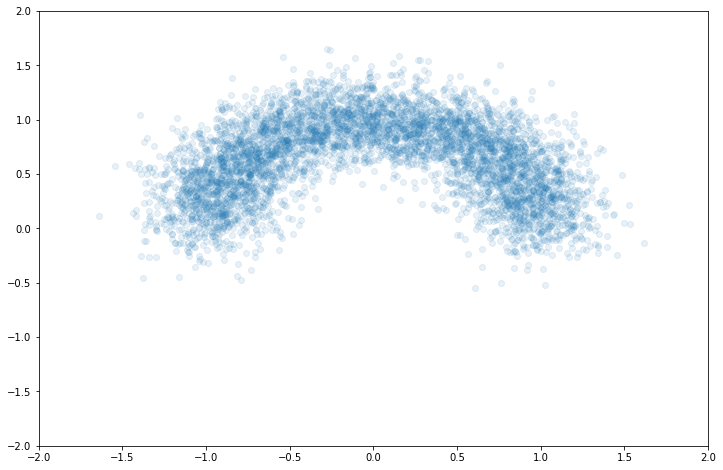

In [150]:
n = 5000
thetas = np.random.uniform(0, np.pi, size=n)
xs = np.cos(thetas) + np.random.normal(loc=0., scale=0.2, size=n)
ys = np.sin(thetas) + np.random.normal(loc=0., scale=0.2, size=n)

XT = np.concatenate((np.expand_dims(xs, axis=-1), np.expand_dims(ys, axis=-1)), axis=-1)
cov_matrix = XT.T @ XT
cov_x_y = cov_matrix[0,1]
sigma_x = np.sqrt(cov_matrix[0,0])
sigma_y = np.sqrt(cov_matrix[1,1])
print("correlation factor:", cov_x_y / (sigma_x * sigma_y))

plt.figure(figsize=(12, 8))
plt.scatter(xs, ys, alpha=0.1)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.show()

We could try to predict the Y from the X, and if we can, then it means that there is correlation.

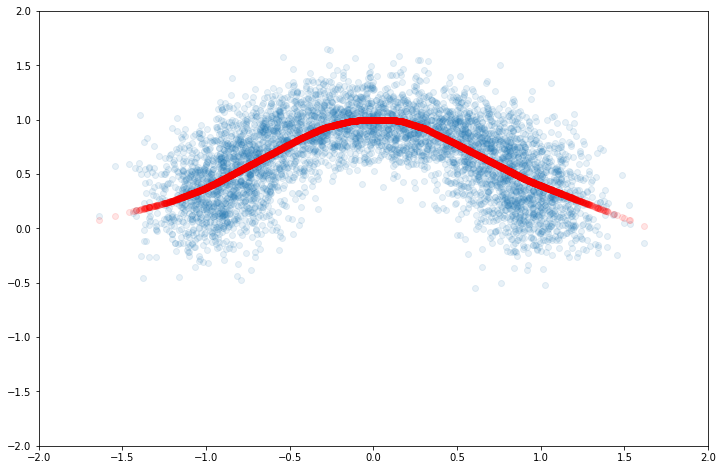

In [156]:
model = nn.Sequential(
    nn.Linear(1, 32),
    nn.ReLU(),
    nn.Linear(32, 1))

model.train()
optimizer = optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)
criterion = nn.MSELoss()
ds = data.TensorDataset(torch.FloatTensor(xs).unsqueeze(-1),
                        torch.FloatTensor(ys).unsqueeze(-1))
loader = data.DataLoader(ds, shuffle=True, batch_size=100)

for _ in range(25):
    episode_loss = 0.
    for x, y in loader:
        y_p = model(x)
        loss = criterion(y_p, y)
        optimizer.zero_grad()
        loss.backward()
        episode_loss += loss.item()
        optimizer.step()
    # print(episode_loss)

model.eval()
y_pred = model(torch.FloatTensor(xs).unsqueeze(-1)).detach().numpy()
    
plt.figure(figsize=(12, 8))
plt.scatter(xs, ys, alpha=0.1)
plt.scatter(xs, y_pred, alpha=0.1, color='red')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.show()

<br>

# Bayesian regression
---

**todo - variational inference & latent variable**